# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Import Cleaned data

In [2]:
# Importing latest cleaned data
data = pd.read_csv('data/dementia_patients_cleaned_2_After EDA.csv')
data.head(5)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,...,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,True,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,2,Left,...,False,2,False,1,True,10,Low-Carb Diet,False,True,0
1,False,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,3,Right,...,False,1,True,3,True,1,Low-Carb Diet,False,True,1
2,False,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,2,Right,...,True,1,False,3,True,8,Mediterranean Diet,False,True,0
3,False,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,3,Left,...,True,0,False,2,True,5,Balanced Diet,False,True,1
4,True,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,3,Right,...,True,0,True,2,True,0,Low-Carb Diet,True,True,1


In [3]:
# This code prepares the data for logistic regression by selecting specific features, scaling the numerical features,
# and combining the numerical and boolean features into a single DataFrame. 

# It also selects the target variable for prediction.

# The numerical features are standardized using StandardScaler from scikit-learn. Finally, the code prints the first few rows
# of the prepared data for inspection.

scaler = StandardScaler()
data_numbers = data[['HeartRate', 'BloodOxygenLevel', 'Weight', 'MRI_Delay', 'Age']]
data_numberscale = data[['Education_Level','Smoking_Status','Physical_Activity','Cognitive_Test_Scores']]
data_boolean = data[['Diabetic','Family_History','APOE_ε4','Depression_Status','Sleep_Quality','Chronic_Health_Conditions']]
data_dementia = data['Dementia']

data_numerical = pd.concat([data_numbers,data_numberscale],axis = 1)
data_predictor = pd.concat([data_numerical,data_boolean], axis = 1)

print("\nNumerical and Scale Data Combined:")
print(data_numerical.head())
print("\nPredictor Data (Numerical, Scale, and Boolean Combined):")
print(data_predictor.head())


Numerical and Scale Data Combined:
   HeartRate  BloodOxygenLevel     Weight  MRI_Delay  Age  Education_Level  \
0         98         96.230743  57.563978  36.421028   60                2   
1         78         93.032122  56.832335  31.157633   61                3   
2         89         93.566504  59.759066  37.640435   69                2   
3         60         93.906510  58.266471  50.673992   78                3   
4         67         97.508994  67.705027  27.810601   77                3   

   Smoking_Status  Physical_Activity  Cognitive_Test_Scores  
0               2                  1                     10  
1               1                  3                      1  
2               1                  3                      8  
3               0                  2                      5  
4               0                  2                      0  

Predictor Data (Numerical, Scale, and Boolean Combined):
   HeartRate  BloodOxygenLevel     Weight  MRI_Delay  Age  Educat

# Random Resampling without Cognitive_Test_Scores

In [4]:
scaler = StandardScaler()
data_numbers = data[['HeartRate', 'BloodOxygenLevel', 'Weight', 'MRI_Delay', 'Age']]
data_numberscale = data[['Education_Level','Smoking_Status','Physical_Activity']]
data_boolean = data[['Diabetic','Family_History','APOE_ε4','Depression_Status','Sleep_Quality','Chronic_Health_Conditions']]
data_dementia = data['Dementia']

data_numerical = pd.concat([data_numbers,data_numberscale],axis = 1)
data_predictor = pd.concat([data_numerical,data_boolean], axis = 1)

In [5]:
X = data_predictor
y = data_dementia
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_scaled, y_train)
print("Dementia vs Non-Dementia Train Set Proportion")
print(y_train.value_counts()[1], ':', y_train.value_counts()[0])
print("\nThe overall classification accuracy \t\t: ", logreg.score(X_test_scaled, y_test))

Dementia vs Non-Dementia Train Set Proportion
333 : 367

The overall classification accuracy 		:  0.74


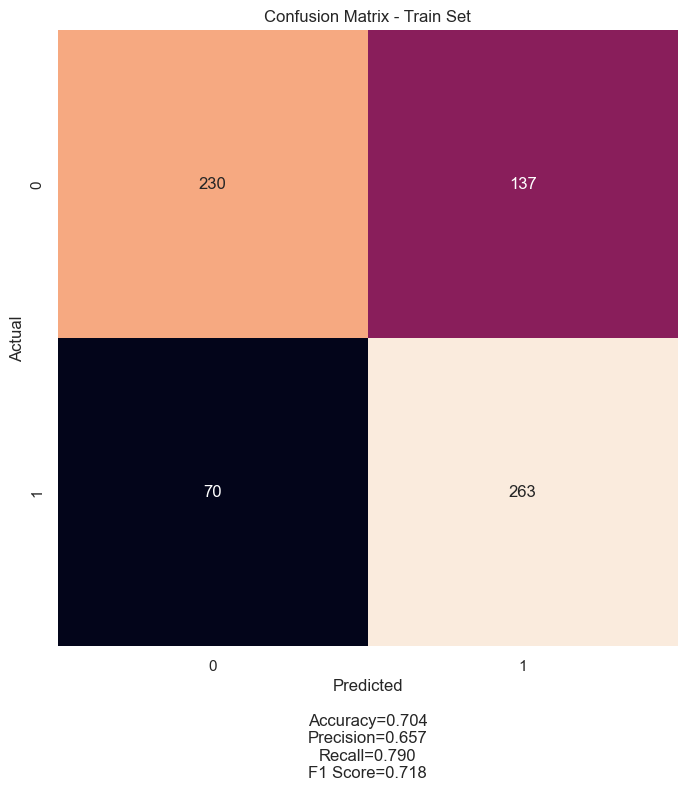

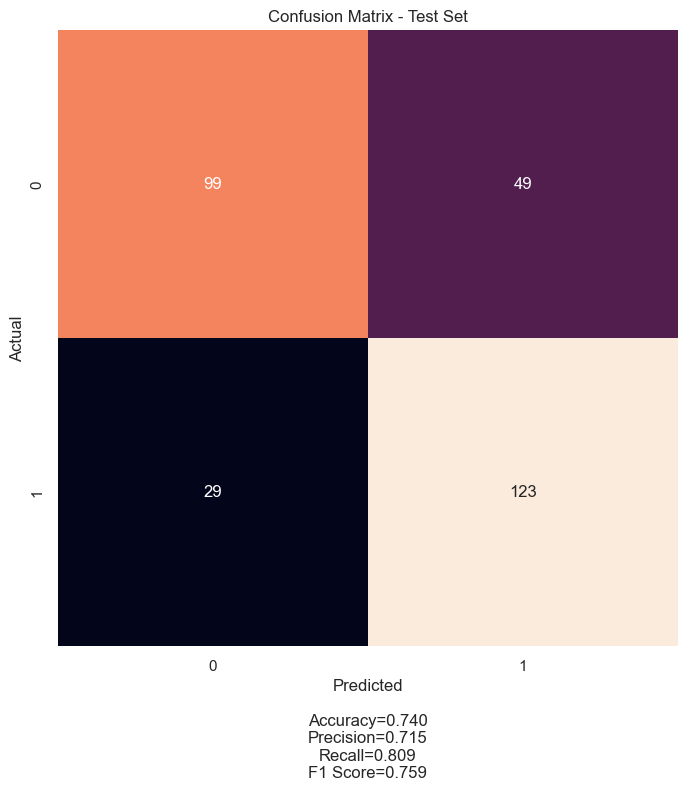

In [6]:
#Visualization function and evaluation
def visualisation(y_true, y_pred, title):
    f = plt.figure(figsize=(8, 8))
    cf = confusion_matrix(y_true, y_pred)
    sb.heatmap(cf, fmt='.0f', annot=True, cbar=False)
    
    accuracy = np.trace(cf) / float(np.sum(cf))
    precision = cf[1, 1] / sum(cf[:, 1]) if sum(cf[:, 1]) != 0 else 0
    recall = cf[1, 1] / sum(cf[1, :]) if sum(cf[1, :]) != 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0
    
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
        accuracy, precision, recall, f1_score)
    
    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

visualisation(y_train, y_train_pred, 'Confusion Matrix - Train Set')
visualisation(y_test, y_test_pred, 'Confusion Matrix - Test Set')


Comparing the confusion matrixes from both our models (Logistic Regression and Logistic Regression without 'Cognitive_Test_Scores'), all metrics of our model has dropped by quite a significant amount after we removed 'Cognitive_Test_Scores'.
<br>
<br>Our train set accuracy dropped from 0.993 to 0.704 (about 29%) 
<br>Our test set accuracy dropped from 0.990 to 0.740 (about 25%)
<br>
<br>Our train set precision dropped from 1.00 to 0.657 (about 34%) 
<br>Our test set precision dropped from 1.00 to 0.715 (about 29%)
<br>
<br>Our train set recall dropped from 0.985 to 0.790 (about 20%) 
<br>Our test set recall dropped from 0.981 to 0.809 (about 18%)
<br>
<br>Our train set F1 Score dropped from 0.992 to 0.718 (about 28%) 
<br>Our test set F1 Score dropped from 0.990 to 0.759 (about 23%)


According to our test set, our current model has a recall of 0.809 and a precision of 0.715. Hence, we conclude that without 'Cognitive_Test_Scores', our model is still considered effective in detecting dementia. 